In [46]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn import tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
sklearn.__version__

'0.22.2'

In [15]:
digits = sklearn.datasets.load_digits()

sklearn.utils.Bunch

In [19]:
X = digits.data
y = digits.target

In [24]:
tree_classifier = tree.DecisionTreeClassifier()
res_1 = cross_val_score(tree_classifier, X, y, cv=10)

# Ответ на первое задание

In [26]:
res_1.mean()

0.8319118559900682

In [29]:
bagg_classifier = BaggingClassifier(tree_classifier, n_estimators=100)
res_2 = cross_val_score(bagg_classifier, X, y, cv=10)

# Ответ на второе задание

In [30]:
res_2.mean()

0.9231750465549349

In [33]:
bagg_classifier_2 = BaggingClassifier(tree_classifier, n_estimators=100, max_features=8)
res_3 = cross_val_score(bagg_classifier_2, X, y, cv=10)

# Ответ на третье задание 

In [34]:
res_3.mean()

0.9287709497206702

In [37]:
bagg_classifier_3 = BaggingClassifier(tree.DecisionTreeClassifier(max_features=8), n_estimators=100)
res_4 = cross_val_score(bagg_classifier_3, X, y, cv=10)

# Ответ на четвертое задание

In [38]:
res_4.mean()

0.9538050900062073

# Все дальше относится к пятому заданию

In [41]:
rand_forest = RandomForestClassifier(max_features=8)
res_5 = cross_val_score(rand_forest, X, y, cv=10)
res_5.mean()

0.9532495344506516

In [47]:
train_sizes, train_scores, test_scores = learning_curve(rand_forest, X, y, 
                                                                       train_sizes=np.arange(0.1,1., 0.2), 
                                                                       cv=5, scoring='accuracy')

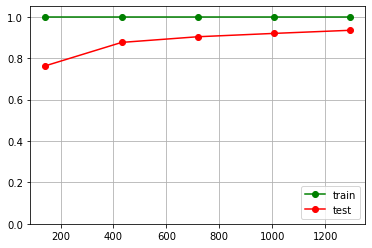

In [48]:
pylab.grid(True)
pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker='o', label='train')
pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker='o', label='test')
pylab.ylim((0.0, 1.05))
pylab.legend(loc='lower right')

In [52]:
trees_number = np.arange(10, 200, 20)
scores = list()
for i in trees_number:
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i), X, y, cv=5).mean())

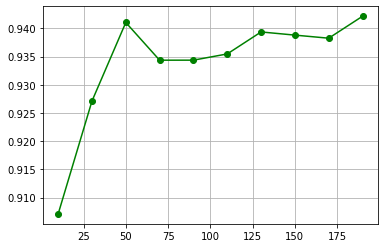

In [53]:
pylab.grid(True)
pylab.plot(trees_number, scores, 'g-', marker='o', label='train')

In [54]:
features = np.arange(1, 64, 2)
scores = list()
for i in features:
    scores.append(cross_val_score(RandomForestClassifier(max_features=i), X, y, cv=5).mean())

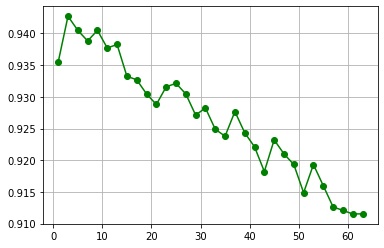

In [55]:
pylab.grid(True)
pylab.plot(features, scores, 'g-', marker='o', label='train')

In [56]:
depth = np.arange(2, 50, 4)
scores = list()
for i in features:
    scores.append(cross_val_score(RandomForestClassifier(max_depth=pth=i), X, y, cv=5).mean())

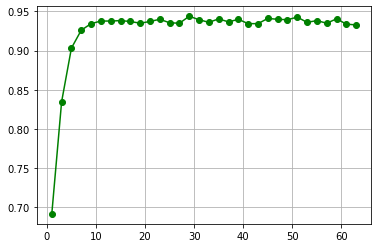

In [57]:
pylab.grid(True)
pylab.plot(features, scores, 'g-', marker='o', label='train')